In [98]:
import pandas as pd

In [99]:
df = pd.read_excel('bank_data.xlsx')

In [100]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [101]:
import matplotlib.pyplot as plt

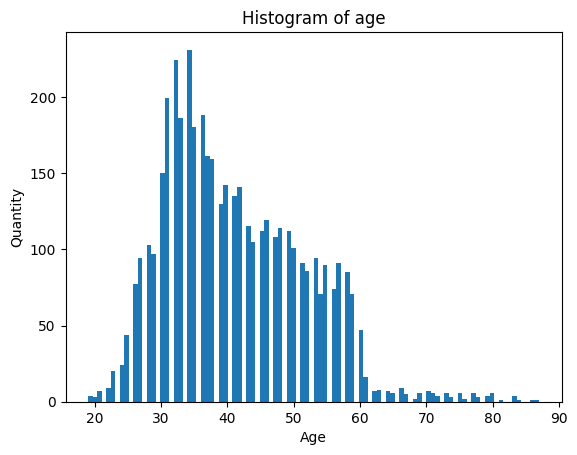

In [102]:
age = df['age']
plt.hist(age, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.title('Histogram of age')
plt.show()

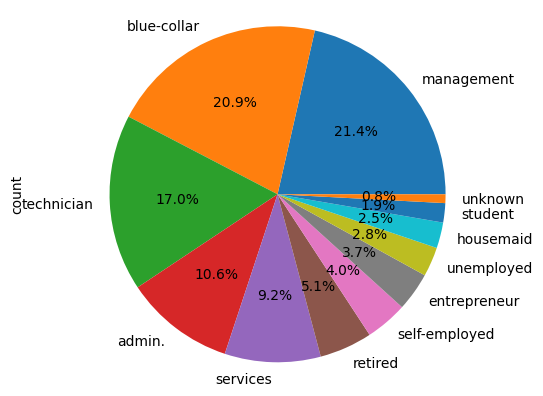

In [103]:
df['job'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

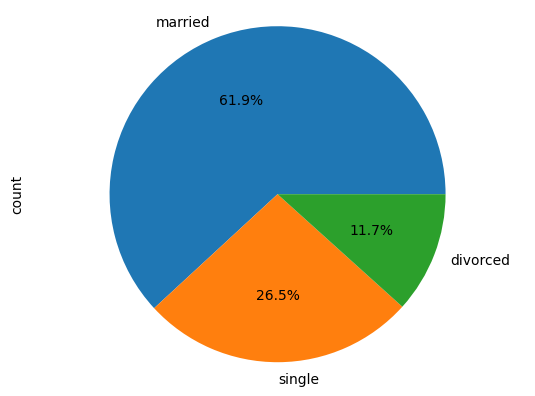

In [104]:
df['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

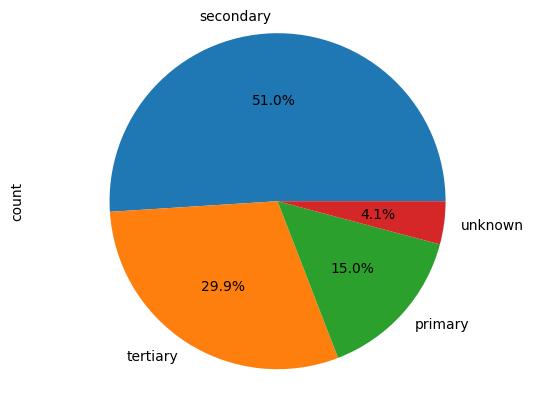

In [105]:
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

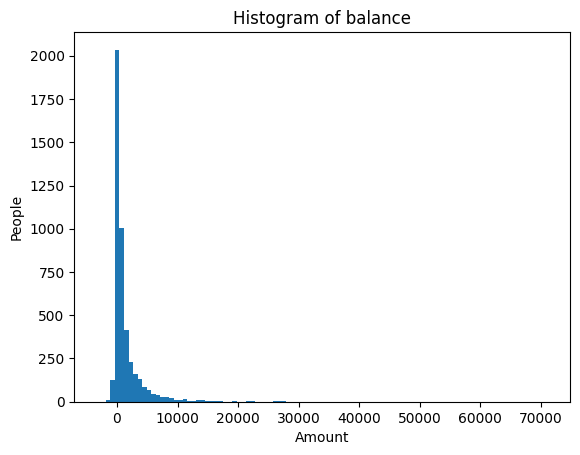

In [106]:
balance = df['balance']
plt.hist(balance, bins=100)  # Adjust the number of bins as needed
plt.xlabel('Amount')
plt.ylabel('People')
plt.title('Histogram of balance')
plt.show()

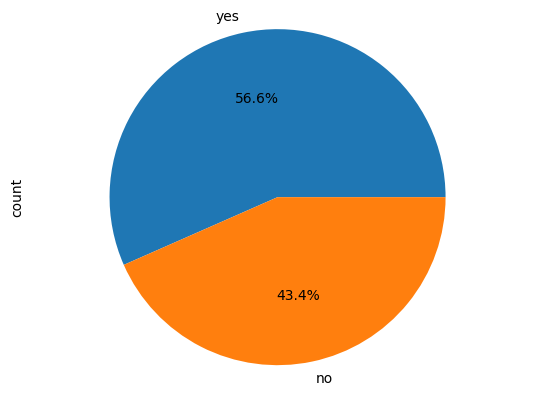

In [107]:
df['housing'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

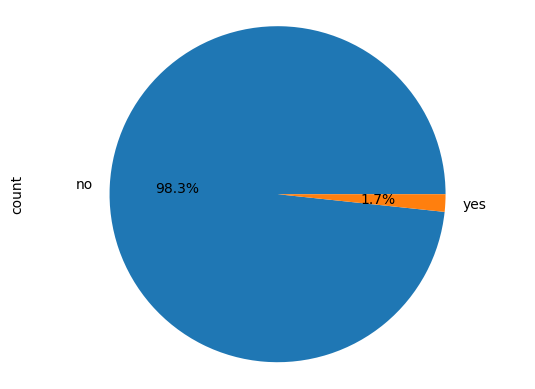

In [108]:
df['default'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

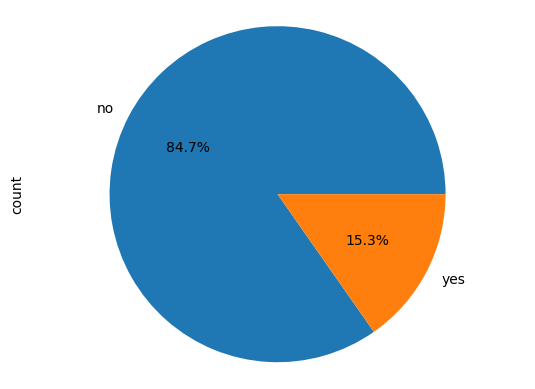

In [109]:
df['loan'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

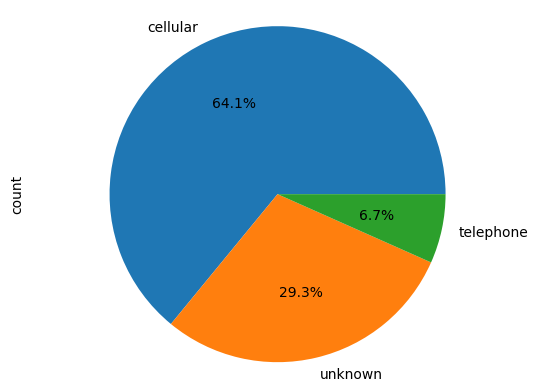

In [110]:
df['contact'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

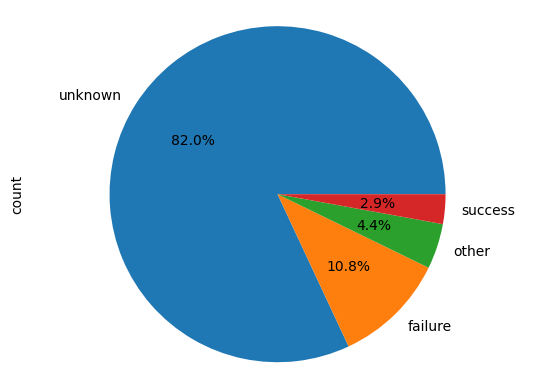

In [111]:
df['poutcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [112]:
# Split the data into features and target variable
X = df.drop('y', axis=1)
y = df['y']


In [113]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [125]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['job'] = encoder.fit_transform(df['job'])
df['marital'] = encoder.fit_transform(df['marital'])
df['education'] = encoder.fit_transform(df['education'])
df['default'] = encoder.fit_transform(df['default'])
df['housing'] = encoder.fit_transform(df['housing']) 
df['loan'] = encoder.fit_transform(df['loan']) 
df['contact'] = encoder.fit_transform(df['contact'])
df['month'] = encoder.fit_transform(df['month'])
df['poutcome'] = encoder.fit_transform(df['poutcome']) 
df['y'] = encoder.fit_transform(df['y']) 

In [129]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [130]:
# Split the data into features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [134]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [135]:
# Make predictions
naive_bayes_predictions = naive_bayes.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)

In [136]:
# Evaluate the models
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

In [137]:
print("Naive Bayes Classifier Accuracy: {:.2f}%".format(naive_bayes_accuracy * 100))
print("Decision Tree Classifier Accuracy: {:.2f}%".format(decision_tree_accuracy * 100))

# You can also print classification reports for more detailed evaluation
print("Naive Bayes Classification Report:\n", classification_report(y_test, naive_bayes_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree_predictions))

Naive Bayes Classifier Accuracy: 83.20%
Decision Tree Classifier Accuracy: 87.18%
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       807
           1       0.31      0.45      0.37        98

    accuracy                           0.83       905
   macro avg       0.62      0.66      0.63       905
weighted avg       0.86      0.83      0.85       905

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905

